# Исследование объявлений о продаже квартир

У нас есть данные из объявлений о продаже квартир в Санкт- Петербурге и  соседних населенных пунктах Ленинградской области за несколько лет.

Данные получены из двух источников, первый - это само объявление, которое заполнял пользователь, второй - картографические данные, котровые были получены автоматически.

**Наша задача**: изучить данные и выяснить какие параметры влияют на стоимость квартиры.

## Получение данных

In [7]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv',sep='\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

У нас есть данные о 23 699 объявлениях по продаже квартиры. Всего мы имеем 21 параметр, 14 из них заполняются пользователем,такие как количество фотографий объекта, стоимость, общая  и жилая площадь, площадь кухни, количество комнат, высота потолков, этаж, на котором располагается квартира, общее число этажей в доме, количество балконов, название населенного пункта, является ли объект апартаментами, студией или есть ли там открытая планировка и день подачи объявления. Оставшиеся 7 параметров получены из картографических данных: расстояние до ближайшего аэропорта, до центра города, наличие в радиусе трех километров парков и прудов, а также расстояния до ближайших них и сколько дней было размещено объявление.

Посмотрим на наши данные.

In [11]:
pd.set_option('display.max_columns', None) # Выведем все колонки на печать.
data.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


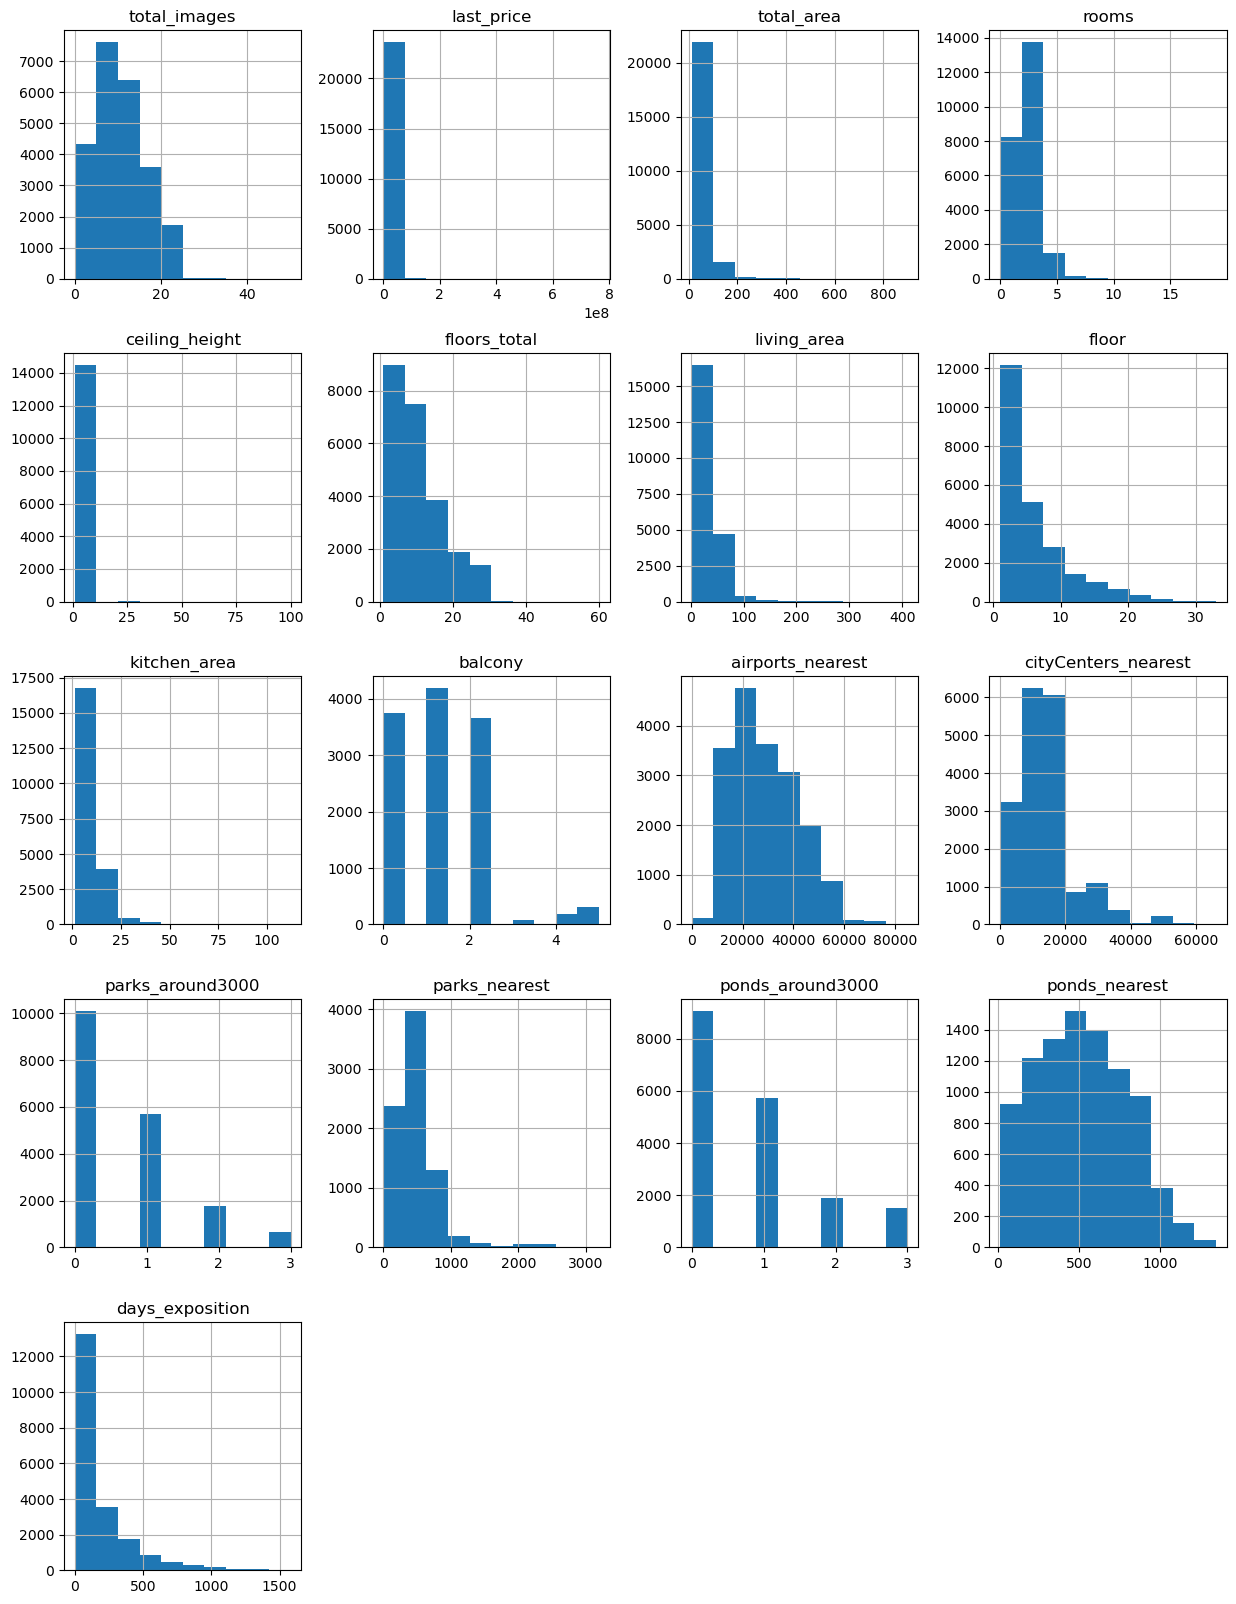

In [12]:
# Построим гистограммы для всех числовых столбцов нашего датафрейма.
data.hist(figsize=(15, 20));

На первый взглад по графикам можно сказать, что в основном продаются квартиры площадью до 100 кв.м. на нижних этажах ( до 6-7), хотя есть объявления с площадью 400 и больше квадратных метров, будут вопросы по данным о высоте потолков, так как видно, что есть данные с показателями от 20 до 30 метров. Большая часть объявлений продается в течение 250 дней. 

Мы уже можем сказать, что в данных много пропусков, посмотрим где и в каких количествах они встречаются.

## Обработка данных

В названии столбца `cityCenters_nearest` есть заглавная буква, заменим заглавные буквы на строчные.

In [16]:
data = data.rename(columns = {'cityCenters_nearest':'city_centers_nearest'})
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

### Избавляемся от пропусков

Посмотрим есть ли пропуски в наших данных

In [19]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Как видим в данных достаточно много пропусков, причем в столбцах, полученных из автоматических систем, пропуски присутствуют во всех данных.

*Рассмотрим сначала пропуски в данных, заполняемых пользователем.*

Многочисленные пропуски в столбце `is_apartment` не позволяют исключить данные с пропусками в этом столбце, но и заполнить пропуски мы не можем, хотя параметр может значительно влиять на стоимость помещения, так как апартаменты дешевле квартир. 

Пропущенные значения в площади кухни и жилой площади, названии населенного пункта, высоте потолков являются следствием человеческого фактора, при подаче объявления человек намеренно или нет не заполнял данные в форме. 

Рассмотрим столбец `balcony`, скорее всего пропуск данных означает, что балконов в помещении нет, поэтому в этом столбце мы заполним пропуски нулевым значением.

In [22]:
data['balcony'] = data['balcony'].fillna(0)

In [23]:
# Проверим, что мы заполнили все пропуски.
data['balcony'].isna().sum()

0

В столбце `locality_name`пропущены названия 49 населенных пунктов, восстановить значения не представляется возможным, поэтому удалим  эти строки.

In [25]:
data = data.dropna(subset=['locality_name'])
data['locality_name'].isna().sum() # проверим, что удалили все пропуски.

0

Если продаваемая квартира является квартирой-студией, то в таких случаях площадь кухни не выделяется. Посмотрим сколько у нас объявлений о продаже квартир-студий.

In [27]:
data.query('studio==True') 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30T00:00:00,0,NaN,24.0,15.50,2,NaN,True,False,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
440,8,2480000.0,27.11,2018-03-12T00:00:00,0,NaN,17.0,24.75,4,NaN,True,False,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
608,2,1850000.0,25.00,2019-02-20T00:00:00,0,NaN,10.0,NaN,7,NaN,True,False,NaN,0.0,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
697,12,2500000.0,24.10,2017-12-01T00:00:00,0,2.75,25.0,17.50,21,NaN,True,False,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,201.0
716,5,1500000.0,17.00,2017-06-07T00:00:00,0,2.70,9.0,12.00,1,NaN,True,False,NaN,0.0,посёлок Шушары,18654.0,29846.0,0.0,NaN,0.0,NaN,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22867,8,3090000.0,30.00,2017-12-17T00:00:00,0,NaN,25.0,18.20,5,NaN,True,False,NaN,0.0,Санкт-Петербург,35250.0,16414.0,0.0,NaN,1.0,400.0,211.0
22877,2,4280000.0,28.00,2017-10-26T00:00:00,0,2.70,19.0,18.00,10,NaN,True,False,NaN,0.0,Санкт-Петербург,18982.0,7206.0,0.0,NaN,1.0,415.0,151.0
23210,7,3200000.0,26.00,2017-09-01T00:00:00,0,NaN,25.0,18.00,16,NaN,True,False,NaN,0.0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0
23554,15,3350000.0,26.00,2018-09-07T00:00:00,0,NaN,19.0,NaN,8,NaN,True,False,NaN,0.0,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0


Видим, что всего у нас 149 таких объявлений, а всего пропусков 2278. Заполним такие пропуски нулевым значением, да, мы уберем всего 6,5% пропусков, но все же, чем меньше непонятных данных, тем лучше.

In [29]:
studio_index = data.query('studio==True').index # сохраним индексы строк с квартирами-студиями в отдельный список.
for index in studio_index:
    data.loc[index,'kitchen_area'] = 0 # заполним пропуски в этих строках на 0.

Исключим также строки, где есть пропуски в столбце `floors_total`, их всего 86, они не повлияют глобально на поведение данных.

In [31]:
data = data.dropna(subset=['floors_total'])
data['floors_total'].isna().sum() # проверим, что удалили все пропуски.

0

У нас остались пропуски в столбцах `ceiling_height` и `living_area`.

Заполним пропуски в `ceiling_height` медианными значениями по населенным пунктам, так как они меньше реагируют на выбросы значений (а мы помним, что у нас попадались странные значения в 25-30 метров). Для этого нам нужно устранить дубликаты в названиях населенных пунктов.

Выведем список уникальных названий населенных пунктов.

In [34]:
sorted(data['locality_name'].unique(),reverse=True)

['село Шум',
 'село Старая Ладога',
 'село Русско-Высоцкое',
 'село Рождествено',
 'село Путилово',
 'село Паша',
 'село Павлово',
 'село Никольское',
 'село Копорье',
 'садовое товарищество Садко',
 'садовое товарищество Рахья',
 'садовое товарищество Приладожский',
 'садовое товарищество Новая Ропша',
 'садоводческое некоммерческое товарищество Лесная Поляна',
 'посёлок станции Свирь',
 'посёлок станции Громово',
 'посёлок при железнодорожной станции Приветнинское',
 'посёлок при железнодорожной станции Вещево',
 'посёлок городского типа имени Свердлова',
 'посёлок городского типа имени Морозова',
 'посёлок городского типа Форносово',
 'посёлок городского типа Ульяновка',
 'посёлок городского типа Токсово',
 'посёлок городского типа Тайцы',
 'посёлок городского типа Сиверский',
 'посёлок городского типа Рябово',
 'посёлок городского типа Рощино',
 'посёлок городского типа Павлово',
 'посёлок городского типа Мга',
 'посёлок городского типа Лебяжье',
 'посёлок городского типа Кузьмолов

Уберем неявные дубликаты, сначала для этого уберем разницу в написании с буквой ё и без нее.

Также изменим некоторые дублирующиеся названия, например, названия поселок, городской поселок, поселок городского типа, коттеджный поселок одинаковы. 

Уберем название поселок при железнодорожной станции, оставив поселок при станции...

Названия поселок Мурино и Мурино также одинаковы, поэтому оставим Мурино, так как сейчас он считается городом.

In [37]:
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
   )
data['locality_name'] = data['locality_name'].replace([' при железнодорожной'], '',regex=True)
data['locality_name'] = data['locality_name'].replace(['городской ', 'коттеджный ',' городского типа',''], '',regex=True)
data['locality_name'] = data['locality_name'].replace(['поселок Мурино'], 'Мурино',regex=True)
sorted(data['locality_name'].unique(), reverse=False)

['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалево',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'деревня Агалатово',
 'деревня Аро',
 'деревня Батово',
 'деревня Бегуницы',
 'деревня Белогорка',
 'деревня Большая Вруда',
 'деревня Большая Пустомержа',
 'деревня Большие Колпаны',
 'деревня Большое Рейзино',
 'деревня Большой Сабск',
 'деревня Бор',
 'деревня Борисова Грива',
 'деревня Ваганово',
 'деревня Вартемяги',
 'деревня Вахнова Кара',
 'деревня Выскатка',
 'деревня Гарболово',
 'деревня Глинка',
 '

После того, как мы убрали дубликаты из названий населенных пунктов, займемся столбцом `ceiling_height`.

In [39]:
# Заменим пропуски в столбце ceiling_height медианными значениями по населенным пунктам
import math
for locality in data['locality_name'].unique():
    # запишем в переменную количество значений, по которым будем считать медиану
    not_empty_count = data.loc[data['locality_name'] == locality, 'ceiling_height'].count() 
    if (not_empty_count == 0):
        median = 2.4 # если все значения пропущены, то медиане присвоим минимальную норму в России, равную 2.4 м.
    else:
        median = data.loc[data['locality_name'] == locality, 'ceiling_height'].median()
    data.loc[(data['locality_name'] == locality) & (data['ceiling_height'].isna()), 'ceiling_height']=median
# Проверим, что пропусков в столбце ceiling_height больше нет
data['ceiling_height'].isna().sum()
data['ceiling_height'].describe()

count    23565.000000
mean         2.730854
std          1.004651
min          1.000000
25%          2.550000
50%          2.700000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

Жилая площадь это сумма площадей всех жилых помещений. К жилой площади относятся только те помещения, которые пригодны для проживания: гостиная, спальня, детская. Сюда не относятся: кухня, санузлы, коридор, кладовые и гардеробные. Так как у нас из данных есть только общая площадь и площадь кухни, то рассчитать жилую площадь не удастся. Проверим, верно ли указаны площади в объявлениях. Найдем строки, в которых сумма жилой площади и площади кухни больше или равно  общей площади

In [41]:
data.query('total_area <= kitchen_area + living_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
184,7,2600000.0,30.20,2018-02-14T00:00:00,1,2.65,9.0,26.10,5,NaN,False,False,6.20,0.0,Санкт-Петербург,13952.0,15031.0,0.0,NaN,1.0,824.0,12.0
220,8,3890000.0,37.00,2018-07-09T00:00:00,1,2.50,25.0,28.00,6,NaN,False,False,9.00,0.0,Санкт-Петербург,25408.0,16166.0,0.0,NaN,0.0,NaN,28.0
545,9,4700000.0,23.80,2018-12-28T00:00:00,1,2.70,18.0,20.00,9,NaN,False,False,5.00,0.0,Санкт-Петербург,9731.0,11849.0,0.0,NaN,0.0,NaN,108.0
551,8,3100000.0,31.59,2018-03-08T00:00:00,1,2.70,19.0,30.55,2,NaN,False,False,9.28,2.0,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,70.0
601,12,5600000.0,53.70,2017-04-18T00:00:00,2,2.50,12.0,48.30,5,NaN,False,False,7.00,2.0,Санкт-Петербург,50477.0,13252.0,2.0,220.0,1.0,1250.0,167.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22869,0,15000000.0,25.00,2018-07-25T00:00:00,1,100.00,5.0,14.00,5,True,False,False,11.00,5.0,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0
22963,16,3150000.0,102.00,2018-06-26T00:00:00,5,2.50,9.0,78.00,8,NaN,False,False,24.00,1.0,Кингисепп,NaN,NaN,NaN,NaN,NaN,NaN,57.0
23202,13,4919880.0,67.92,2018-10-23T00:00:00,2,2.70,3.0,63.00,3,NaN,False,False,13.04,0.0,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,60.0
23297,10,1850000.0,48.20,2019-03-13T00:00:00,2,2.50,5.0,42.20,2,NaN,False,False,6.00,1.0,Высоцк,NaN,NaN,NaN,NaN,NaN,NaN,45.0


Получили 134 таких объявления. Удалим эти строки.

In [43]:
data = data.drop(data[data['total_area'] <= data['kitchen_area'] + data['living_area']].index)

Займемся теперь пропусками в данных, полученных из картографических систем.

В столбце `airports_nearest` указано расстояние до ближайшего аэропорта, в Санкт-Петербурге это аэропорт Пулково. Посмотрим, в каких строчках стоят пропуски.

In [45]:
data[data['airports_nearest'].isna()].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.40,5,NaN,False,False,9.10,0.0,поселок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.70,27.0,15.43,26,NaN,False,False,8.81,0.0,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,2.60,5.0,30.00,5,NaN,False,False,9.00,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.00,15,NaN,False,False,11.00,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,2.56,9.0,NaN,2,NaN,False,False,NaN,0.0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.80,2017-10-28T00:00:00,2,2.50,5.0,NaN,1,NaN,False,False,NaN,0.0,поселок Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
38,10,3150000.0,40.00,2018-03-29T00:00:00,1,2.75,18.0,16.30,9,NaN,False,False,11.60,0.0,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,103.0
47,17,3600000.0,56.10,2018-10-18T00:00:00,3,2.55,4.0,42.50,3,NaN,False,False,5.70,1.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,179.0
60,3,2740000.0,35.00,2018-01-01T00:00:00,1,2.70,12.0,NaN,8,NaN,False,False,NaN,0.0,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,11.0
62,0,4800000.0,78.60,2017-09-17T00:00:00,3,2.80,9.0,48.80,5,NaN,False,False,11.90,2.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,5.0


Вероятнее всего при выгрузке данных произошел сбой и данные не подгрузились, причем не только по данному столбцу, но и по остальным картографическим данным. Посмотрим, сколько пропусков данных мы имеем.

In [47]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1865
floor                       0
is_apartment            20697
studio                      0
open_plan                   0
kitchen_area             2076
balcony                     0
locality_name               0
airports_nearest         5476
city_centers_nearest     5453
parks_around3000         5452
parks_nearest           15442
ponds_around3000         5452
ponds_nearest           14428
days_exposition          3154
dtype: int64

Видим,что количество пропусков в столбцах `airports_nearest`, `city_centers_nearest`,`parks_around3000` и `ponds_around3000` практически одинаковое.

Пропуски заполним медианными значениями по населенным пунктам.

In [49]:
# Напишем функцию, которая будем заменять пропуски в столбце медианным значением по населенному пункту
def distance_fill(column, default_value):
    for locality in data['locality_name'].unique():
        # запишем в переменную количество значений, по которым будем считать медиану
        not_empty_count = data.loc[data['locality_name'] == locality, column].count() 
        if (not_empty_count == 0):
            distance = default_value # если все значения пропущены, то медиане присвоим default_value.
        else:
            distance = data.loc[data['locality_name'] == locality, column].median()
        data.loc[(data['locality_name'] == locality) & (data[column].isna()), column] = distance

Применим эту функцию к столбцам `airports_nearest`, `city_centers_nearest`,`parks_around3000` и `ponds_around3000`.

In [51]:
distance_fill('airports_nearest', 0)
# Проверим, что пропусков больше нет
data['airports_nearest'].isna().sum()

0

In [52]:
distance_fill('city_centers_nearest', 0)
# Проверим, что пропусков больше нет
data['city_centers_nearest'].isna().sum()

0

In [53]:
distance_fill('parks_around3000',0)
# Проверим, что пропусков в столбце больше нет
data['parks_around3000'].isna().sum()

0

In [54]:
distance_fill('ponds_around3000', 0) 
# Проверим, что пропусков в столбце больше нет
data['ponds_around3000'].isna().sum()

0

аналогично поступим со столбцами `parks_nearest` и `ponds_nearest`

In [56]:
distance_fill('parks_nearest', 0) 
# Проверим, что пропусков в столбце больше нет
data['parks_nearest'].isna().sum()

0

In [57]:
distance_fill('ponds_nearest', 0) 
# Проверим, что пропусков в столбце больше нет
data['ponds_nearest'].isna().sum()

0

In [58]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1865
floor                       0
is_apartment            20697
studio                      0
open_plan                   0
kitchen_area             2076
balcony                     0
locality_name               0
airports_nearest            0
city_centers_nearest        0
parks_around3000            0
parks_nearest               0
ponds_around3000            0
ponds_nearest               0
days_exposition          3154
dtype: int64

У нас остались пропуски только по столбцу `days_exposition`. Пропуски в 'days_exposition' говорят нам, что квартиры еще не проданы, поэтому оставляем их.

Изменим тип данных в столбце `days_exposition` на datetime.

In [61]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

А в столбцах `floors_total`, `balcony`, `parks_around3000` и `ponds_around3000` на целочисленный, так как у нас не может быль в доме 2.5 этажа, как и рядом с объектом 1,3 пруда или парка.

In [63]:
for column in ['floors_total','balcony','parks_around3000','ponds_around3000']:
    data[column] = data[column].astype('int')

In [64]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.700,16,51.00,8,NaN,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,2.615,11,18.60,1,NaN,False,False,11.00,2,поселок Шушары,12817.0,18603.0,0,0.0,0,584.5,81.0
2,10,5196000.0,56.00,2015-08-20,2,2.700,5,34.30,4,NaN,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,2.700,14,NaN,9,NaN,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.030,14,32.00,13,NaN,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0
5,10,2890000.0,30.40,2018-09-10,1,2.650,12,14.40,5,NaN,False,False,9.10,0,поселок Янино-1,0.0,0.0,0,0.0,0,0.0,55.0
6,6,3700000.0,37.30,2017-11-02,1,2.640,26,10.60,6,NaN,False,False,14.40,1,поселок Парголово,52996.0,19143.0,0,733.0,0,593.0,155.0
7,5,7915000.0,71.60,2019-04-18,2,2.700,24,NaN,22,NaN,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0,461.0,0,503.0,NaN
8,20,2900000.0,33.16,2018-05-23,1,2.700,27,15.43,26,NaN,False,False,8.81,0,Мурино,0.0,0.0,0,0.0,0,0.0,189.0
9,18,5400000.0,61.00,2017-02-26,3,2.500,9,43.60,7,NaN,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0,461.0,0,503.0,289.0


## Анализ данных

Добавим в нашу таблицу несколько столбцов: стоимость квадратного метра, день недели публикации объявления, месяц публикации и год.

In [67]:
data['cost_per_meter'] = round((data['last_price'] / data['total_area']), 2) #стоимость квадратного метра считаем с точностью 
                                                                            # до двух знаков после запятой

In [68]:
data['exposition_day'] = data['first_day_exposition'].dt.weekday
data['exposition_month'] = data['first_day_exposition'].dt.month
data['exposition_year'] = data['first_day_exposition'].dt.year

In [69]:
# Создадим функцию, которая возвращает тип этажа.
def type_floor(row):
#"""
#Возвращает тип этажа дома:
#- 'первый', если номер этажа 1
#- 'последний', если номер этажа совпадает с количеством этажей в доме
#- 'другой' в остальных случаях
#"""
    floor = row['floor']
    total_floors = row['floors_total']
    if floor==1:
        return 'первый'
    if floor==total_floors:
        return 'последний'
    if floor <= 0:
        print('Ошибка! Этаж должен быть >= 1')
        return 
    return 'другой'    
data['floor_type'] = data.apply(type_floor, axis=1)

In [70]:
# Добавим расстояние до центра города в километрах
data['city_center_km'] = round(data['city_centers_nearest'] / 1000,0)

In [71]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_per_meter,exposition_day,exposition_month,exposition_year,floor_type,city_center_km
0,20,13000000.0,108.0,2019-03-07,3,2.700,16,51.0,8,NaN,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.615,11,18.6,1,NaN,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0,0.0,0,584.5,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.700,5,34.3,4,NaN,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.700,14,NaN,9,NaN,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.030,14,32.0,13,NaN,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.00,1,6,2018,другой,8.0


Рассмотрим некоторые параметры.

### Общая площадь

Первым мы возьмем общую площадь квартиры.

In [75]:
data['total_area'].describe()

count    23431.000000
mean        60.365998
std         35.706852
min         12.000000
25%         40.000000
50%         52.000000
75%         69.800000
max        900.000000
Name: total_area, dtype: float64

Видим, что в объявлениях большая часть квартир имеет площадь не более 100 кв.м., при этом есть и очень маленькие и очень большие значения.

Построим гистограмму.

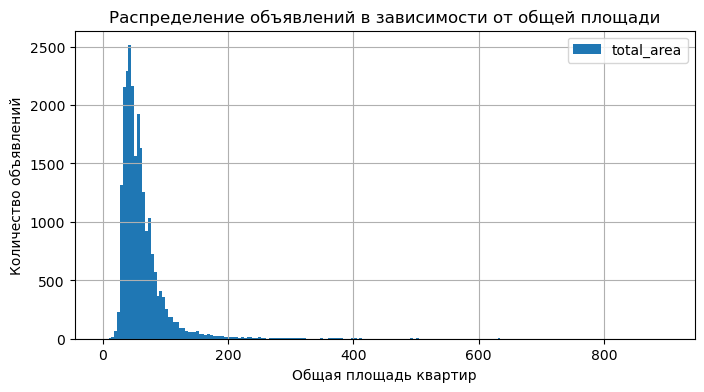

In [77]:
data.plot(y='total_area', kind='hist', bins=200, range=(0,900), grid=True, xlabel='Общая площадь квартир', ylabel='Количество объявлений', title='Распределение объявлений в зависимости от общей площади', figsize=(8,4));

По графику видно, что есть выбросы очень больших и очень маленьких значений. Проверим их. Посмотрим, сколько квартир имеет площадь больше 250 квадратных метров, а сколько меньше 20.

In [79]:
data.query('total_area>250').shape[0]

111

In [80]:
data.query('total_area<20').shape[0]

27

Отбросим эти значения.

In [82]:
data = data.drop(data[data['total_area'] < 20].index)
data = data.drop(data[data['total_area'] > 250].index)
data['total_area'].describe()

count    23293.000000
mean        59.048636
std         28.891316
min         20.000000
25%         40.000000
50%         52.000000
75%         69.100000
max        250.000000
Name: total_area, dtype: float64

In [83]:
data.shape[0]

23293

### Жилая площадь

Изучим данные по жилой площади квартир.

In [86]:
data['living_area'].describe()

count    21455.000000
mean        33.730425
std         18.917750
min          2.000000
25%         18.600000
50%         30.000000
75%         42.000000
max        220.000000
Name: living_area, dtype: float64

Мы видим, что минимальное значение жилой площади в продаваемых квартирах всего 2 кв.м. Посмотрим на строки, где жилая площадь меньше 6 кв.м., так как санитарная норма  жилой площади в России на одного человека установлена в 6 кв.м.

In [88]:
data.query('living_area<6')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_per_meter,exposition_day,exposition_month,exposition_year,floor_type,city_center_km
3242,7,4440000.0,41.0,2017-07-02,1,2.7,17,3.0,17,NaN,False,False,11.0,0,Санкт-Петербург,19272.0,13073.0,0,461.0,0,503.0,216.0,108292.68,6,7,2017,последний,13.0
13915,20,6350000.0,52.0,2018-02-06,2,3.0,6,2.0,2,NaN,False,False,9.0,0,Санкт-Петербург,32453.0,6521.0,0,461.0,1,1012.0,91.0,122115.38,1,2,2018,другой,7.0
17582,11,2680000.0,22.0,2018-08-11,0,2.7,25,5.0,8,NaN,True,False,0.0,2,Санкт-Петербург,22735.0,11618.0,1,835.0,1,652.0,70.0,121818.18,5,8,2018,другой,12.0
21758,0,2330000.0,23.0,2018-01-01,0,2.7,24,2.0,22,NaN,True,False,0.0,0,Мурино,0.0,0.0,0,0.0,0,0.0,66.0,101304.35,0,1,2018,другой,0.0
21943,15,6100000.0,77.6,2019-02-28,4,2.5,9,5.4,1,NaN,False,False,9.8,0,Санкт-Петербург,29338.0,11270.0,1,584.0,0,503.0,33.0,78608.25,3,2,2019,первый,11.0
23574,14,64990000.0,139.0,2015-11-24,3,3.0,8,3.0,8,NaN,False,False,16.0,1,Санкт-Петербург,33255.0,5975.0,1,630.0,3,100.0,280.0,467553.96,1,11,2015,последний,6.0


Отбросим эти значения.

In [90]:
data = data.drop(data[data['living_area'] < 6].index)
data['living_area'].describe()    

count    21449.000000
mean        33.738910
std         18.913579
min          6.000000
25%         18.600000
50%         30.000000
75%         42.000000
max        220.000000
Name: living_area, dtype: float64

In [91]:
data.shape[0]

23287

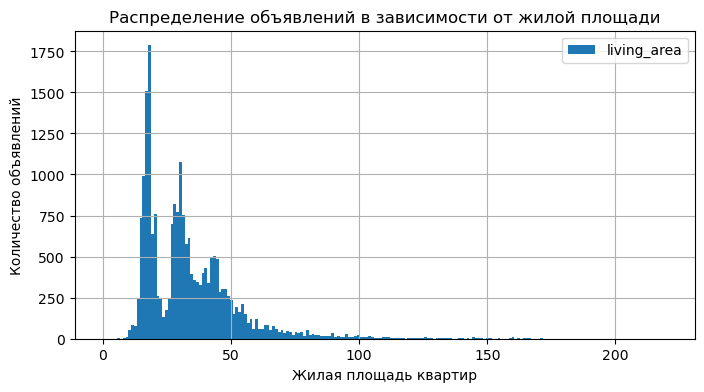

In [92]:
data.plot(y='living_area',grid=True, kind='hist', bins=200,range=(0,220), xlabel='Жилая площадь квартир', ylabel='Количество объявлений', title='Распределение объявлений в зависимости от жилой площади', figsize=(8,4));

In [93]:
# посмотрим, почему есть просадка в значениях от 20 до 25 кв.м.
data.query('living_area<25')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_per_meter,exposition_day,exposition_month,exposition_year,floor_type,city_center_km
1,7,3350000.0,40.40,2018-12-04,1,2.615,11,18.60,1,NaN,False,False,11.00,2,поселок Шушары,12817.0,18603.0,0,0.0,0,584.5,81.0,82920.79,1,12,2018,первый,19.0
5,10,2890000.0,30.40,2018-09-10,1,2.650,12,14.40,5,NaN,False,False,9.10,0,поселок Янино-1,0.0,0.0,0,0.0,0,0.0,55.0,95065.79,0,9,2018,другой,0.0
6,6,3700000.0,37.30,2017-11-02,1,2.640,26,10.60,6,NaN,False,False,14.40,1,поселок Парголово,52996.0,19143.0,0,733.0,0,593.0,155.0,99195.71,3,11,2017,другой,19.0
8,20,2900000.0,33.16,2018-05-23,1,2.700,27,15.43,26,NaN,False,False,8.81,0,Мурино,0.0,0.0,0,0.0,0,0.0,189.0,87454.76,2,5,2018,другой,0.0
10,5,5050000.0,39.60,2017-11-16,1,2.670,12,20.30,3,NaN,False,False,8.50,0,Санкт-Петербург,38357.0,13878.0,1,310.0,2,553.0,137.0,127525.25,3,11,2017,другой,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23686,8,3300000.0,31.00,2017-04-29,1,2.550,9,18.00,6,NaN,False,False,6.50,0,Санкт-Петербург,11751.0,11602.0,1,140.0,1,317.0,193.0,106451.61,5,4,2017,другой,12.0
23687,6,3200000.0,39.00,2017-12-16,1,2.700,9,20.00,6,NaN,False,False,11.00,2,Санкт-Петербург,40837.0,16704.0,0,461.0,0,503.0,38.0,82051.28,5,12,2017,другой,17.0
23689,13,3550000.0,35.30,2018-02-28,1,2.860,15,16.30,4,NaN,False,False,9.10,2,Санкт-Петербург,17284.0,16081.0,1,353.0,2,652.0,29.0,100566.57,2,2,2018,другой,16.0
23692,2,1350000.0,30.00,2017-07-07,1,2.600,5,17.50,4,NaN,False,False,6.00,0,Тихвин,0.0,0.0,0,0.0,0,0.0,413.0,45000.00,4,7,2017,другой,0.0


Видимых несостыковок нет, квартиры с небольшой площадью имеют небольшую жилую площадь.

### Площадь кухни

Рассмотрим площадь кухни.

In [97]:
data['kitchen_area'].describe()

count    21244.00000
mean        10.36713
std          5.57636
min          0.00000
25%          7.00000
50%          9.00000
75%         12.00000
max        107.00000
Name: kitchen_area, dtype: float64

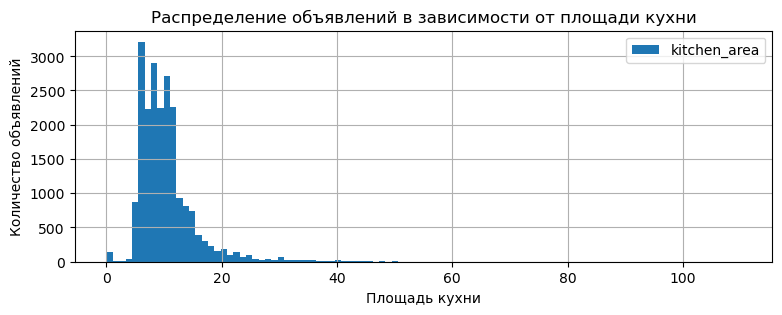

In [98]:
data.plot(y='kitchen_area',grid=True, kind='hist', bins=100,range=(0,110), xlabel='Площадь кухни', 
          ylabel='Количество объявлений', title='Распределение объявлений в зависимости от площади кухни', figsize=(9,3));

Посмотрим на квартиры с очень большими кухнями.

In [100]:
data.query('kitchen_area>50')['kitchen_area'].count()

33

In [101]:
data.query('kitchen_area>50')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_per_meter,exposition_day,exposition_month,exposition_year,floor_type,city_center_km
492,18,95000000.0,216.0,2017-12-05,4,3.00,5,86.00,4,NaN,False,False,77.0,0,Санкт-Петербург,21740.0,436.0,2,138.0,3,620.0,14.0,439814.81,1,12,2017,другой,0.0
3561,5,12300000.0,115.0,2017-08-09,3,2.70,20,45.00,16,NaN,False,False,60.0,1,Санкт-Петербург,33386.0,14234.0,0,461.0,0,503.0,63.0,106956.52,2,8,2017,другой,14.0
4320,20,19700000.0,146.3,2017-02-10,3,3.40,6,55.80,6,NaN,False,False,56.2,0,Санкт-Петербург,23312.0,2450.0,1,548.0,3,883.0,638.0,134654.82,4,2,2017,последний,2.0
4394,20,57000000.0,174.0,2015-11-09,3,3.20,10,95.00,6,NaN,False,False,77.0,0,Санкт-Петербург,31706.0,4166.0,1,193.0,3,199.0,1039.0,327586.21,0,11,2015,другой,4.0
6021,19,16830000.0,117.4,2019-04-04,2,2.75,16,33.40,13,NaN,False,False,51.0,2,Санкт-Петербург,51030.0,14721.0,0,461.0,0,503.0,NaN,143356.05,3,4,2019,другой,15.0
6193,19,24300000.0,230.0,2016-06-03,4,2.70,3,90.00,2,False,False,False,70.0,0,Санкт-Петербург,39422.0,15354.0,0,461.0,1,345.0,397.0,105652.17,4,6,2016,другой,15.0
8261,20,36000000.0,123.2,2018-01-14,1,3.00,14,31.20,7,NaN,False,False,58.4,1,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,61.0,292207.79,6,1,2018,другой,7.0
8559,20,48000000.0,203.3,2017-11-20,7,3.30,6,104.20,3,NaN,False,False,53.1,0,Санкт-Петербург,25293.0,3868.0,1,341.0,0,503.0,146.0,236104.28,0,11,2017,другой,4.0
8709,19,24500000.0,105.0,2017-04-20,2,3.20,6,31.10,2,NaN,False,False,51.0,0,Санкт-Петербург,24980.0,3310.0,2,445.0,0,503.0,159.0,233333.33,3,4,2017,другой,3.0
10789,20,38900000.0,151.6,2018-03-06,4,2.70,9,63.31,5,NaN,False,False,56.0,0,Санкт-Петербург,26055.0,4800.0,1,648.0,1,779.0,106.0,256596.31,1,3,2018,другой,5.0


Вероятнее всего это квартиры с так называемыми кухнями-гостинными, поэтому такие значения не будем считать выбросами,но их мало в наших данных, при этом они могут влиять на средние показатели, поэтому оставим только кухни площадью меньше 50 кв.м.

In [103]:
data = data.drop(data[data['kitchen_area'] > 50].index)
data.shape[0]

23254

### Стоимость квартиры

In [105]:
pd.set_option('display.float_format', lambda x:'%.2f'%x) # служебная строка для вывода больших значений
data['last_price'].describe()

count       23254.00
mean      6143047.68
std       6831867.24
min         12190.00
25%       3400000.00
50%       4600000.00
75%       6700000.00
max     330000000.00
Name: last_price, dtype: float64

Мы получили странное  минимальное значение, равное 12190 руб. Проверим, что за квартира продается по такой цене.

In [107]:
data.query('last_price==12190')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_per_meter,exposition_day,exposition_month,exposition_year,floor_type,city_center_km
8793,7,12190.00,109.00,2019-03-20,2,2.75,25,32.00,25,NaN,False,False,40.50,0,Санкт-Петербург,36421.00,9176.00,1,805.00,0,503.00,8.00,111.83,2,3,2019,последний,9.00


Как видим квартира продается в Санкт-Петербурге, площадью 109 квадратных метров. Вероятнее всего, тут произошла опечатка, и стоимость квартиры составляет 12 190 000 руб. Исправим данное значение.

In [109]:
data.loc[8793,'last_price'] = 12190000
data['last_price'].describe()

count       23254.00
mean      6143571.37
std       6831864.01
min        430000.00
25%       3400000.00
50%       4600000.00
75%       6700000.00
max     330000000.00
Name: last_price, dtype: float64

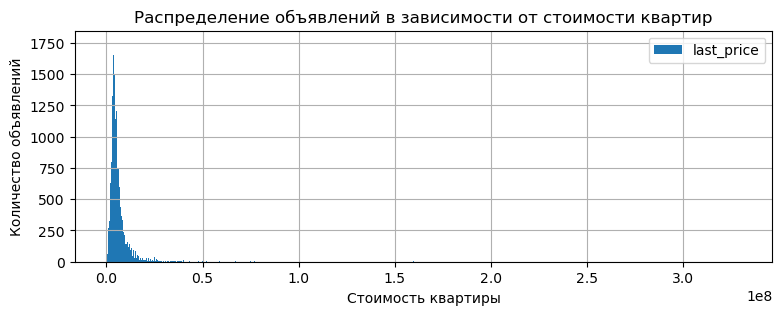

In [110]:
data.plot(y='last_price',grid=True, kind='hist', bins=1000,range=(0,330000000), xlabel='Стоимость квартиры', ylabel='Количество объявлений',
          title='Распределение объявлений в зависимости от стоимости квартир',figsize=(9,3));

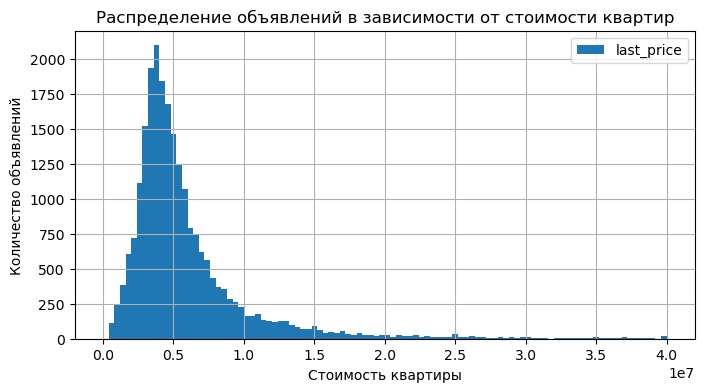

In [111]:
data.plot(y='last_price',grid=True, kind='hist', bins=100, range=(0, 40000000), xlabel='Стоимость квартиры', ylabel='Количество объявлений', 
         title='Распределение объявлений в зависимости от стоимости квартир',figsize=(8,4));

Посмотрим, сколько квартир имеют стоимость больше 40 млн рублей.

In [113]:
data.query('last_price>40000000')['last_price'].count()

104

Посмотрим как распределились квартиры со стоимостью выше 40 млн руб.

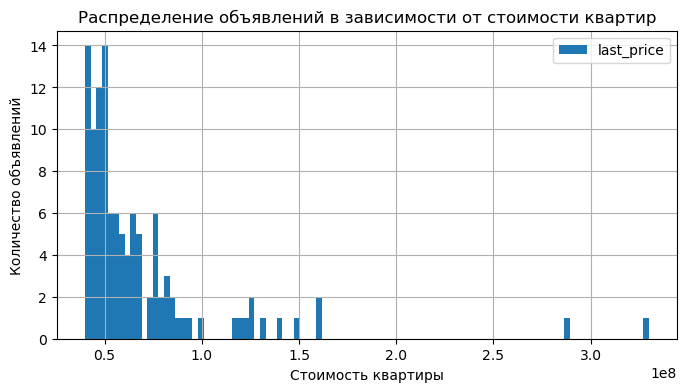

In [115]:
data.plot(y='last_price',grid=True, kind='hist', bins=100, range=(40000000,330000000), xlabel='Стоимость квартиры', ylabel='Количество объявлений', 
          title='Распределение объявлений в зависимости от стоимости квартир',figsize=(8,4));

Оставим значения в интервале от 0 до 40 000 000, остальные можно считать выбросами.

In [117]:
data = data.drop(data[data['last_price'] > 40000000].index)
data.shape[0]

23150

### Количество комнат

Посмотрим, сколько комнат в продаваемых квартирах.

In [120]:
data['rooms'].describe()

count   23150.00
mean        2.05
std         1.02
min         0.00
25%         1.00
50%         2.00
75%         3.00
max        14.00
Name: rooms, dtype: float64

В основном продаются 1-2 комнатные квартиры, хотя есть и уникальные пространства с 14 комнатами.

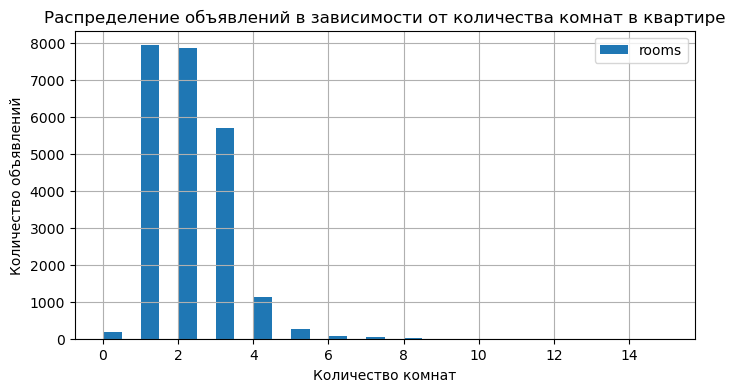

In [122]:
data.plot(y='rooms',grid=True, kind='hist',bins =30, xlabel='Количество комнат', ylabel='Количество объявлений', 
          title='Распределение объявлений в зависимости от количества комнат в квартире', range=(0, 15),figsize=(8,4));

Посмотрим сколько квартир имеют больше 7 комнат

In [124]:
data.query('rooms>7')['rooms'].count()

14

Отбросим эти объявления, так как это очень редкие значения

In [126]:
data = data.drop(data[data['rooms'] > 7].index)
data.shape[0]

23136

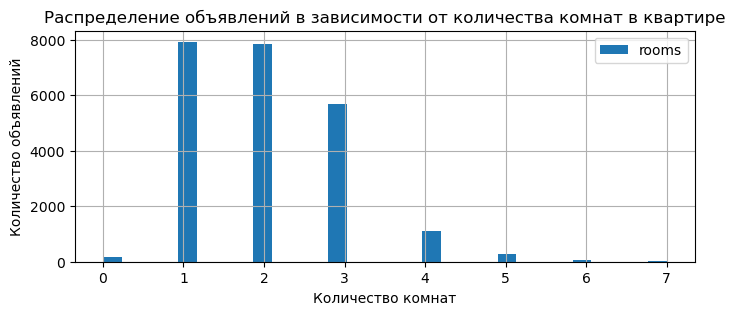

In [127]:
data.plot(y='rooms',grid=True, kind='hist',bins =30, xlabel='Количество комнат', ylabel='Количество объявлений', 
          title='Распределение объявлений в зависимости от количества комнат в квартире',figsize=(8,3));

Больше всего на рынке одно- и  двухкомнатных квартир, реже продают трехкомнатные, а с большим количеством комнат совсем немного. Также есть объекты, такие как квартиры-студии.

### Высота потолков

In [130]:
data['ceiling_height'].describe()

count   23136.00
mean        2.72
std         0.75
min         1.00
25%         2.55
50%         2.70
75%         2.70
max        32.00
Name: ceiling_height, dtype: float64

Снова видим очень большие значения, посмотрим в каких объектах у нас потолки выше 20 метров

In [132]:
data.query('ceiling_height>20')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_per_meter,exposition_day,exposition_month,exposition_year,floor_type,city_center_km
355,17,3600000.00,55.20,2018-07-12,2,25.00,5,32.00,2,False,False,False,NaN,2,Гатчина,0.00,0.00,0,0.00,0,0.00,259.00,65217.39,3,7,2018,другой,0.00
2158,15,1500000.00,42.00,2017-12-23,2,27.00,2,29.00,2,NaN,False,False,5.50,0,деревня Мины,0.00,0.00,0,0.00,0,0.00,NaN,35714.29,5,12,2017,последний,0.00
3148,14,2900000.00,75.00,2018-11-12,3,32.00,3,53.00,2,NaN,False,False,8.00,0,Волхов,0.00,0.00,0,0.00,0,0.00,NaN,38666.67,0,11,2018,другой,0.00
4643,0,4300000.00,45.00,2018-02-01,2,25.00,9,30.00,2,NaN,False,False,7.00,1,Санкт-Петербург,12016.00,13256.00,1,658.00,1,331.00,181.00,95555.56,3,2,2018,другой,13.00
4876,7,3000000.00,25.00,2017-09-27,0,27.00,25,17.00,17,NaN,False,True,NaN,2,Мурино,0.00,0.00,0,0.00,0,0.00,28.00,120000.00,2,9,2017,другой,0.00
5076,0,3850000.00,30.50,2018-10-03,1,24.00,5,19.50,1,True,False,False,5.50,0,Санкт-Петербург,29686.00,8389.00,3,397.00,1,578.00,7.00,126229.51,2,10,2018,первый,8.00
5246,0,2500000.00,54.00,2017-10-13,2,27.00,5,30.00,3,NaN,False,False,9.00,2,деревня Мины,0.00,0.00,0,0.00,0,0.00,540.00,46296.30,4,10,2017,другой,0.00
5669,4,4400000.00,50.00,2017-08-08,2,26.00,9,21.30,3,NaN,False,False,7.00,2,Санкт-Петербург,28981.00,10912.00,1,305.00,0,503.00,267.00,88000.00,1,8,2017,другой,11.00
5807,17,8150000.00,80.00,2019-01-09,2,27.00,36,41.00,13,NaN,False,False,12.00,5,Санкт-Петербург,18732.00,20444.00,0,461.00,3,80.00,38.00,101875.00,2,1,2019,другой,20.00
6246,6,3300000.00,44.40,2019-03-25,2,25.00,5,31.30,5,NaN,False,False,5.70,0,Кронштадт,68923.00,50649.00,1,417.00,2,73.00,NaN,74324.32,0,3,2019,последний,51.00


Вероятно, здесь не поставили запятые, поэтому все значения потолка выше 20 метров уменьшим в 10 раз.

In [134]:
ceiling_index = data.query('20<=ceiling_height').index
for index in ceiling_index:
    data.loc[index,'ceiling_height'] = data.loc[index, 'ceiling_height']/10
    
data['ceiling_height'].describe()    

count   23136.00
mean        2.70
std         0.24
min         1.00
25%         2.55
50%         2.70
75%         2.70
max        14.00
Name: ceiling_height, dtype: float64

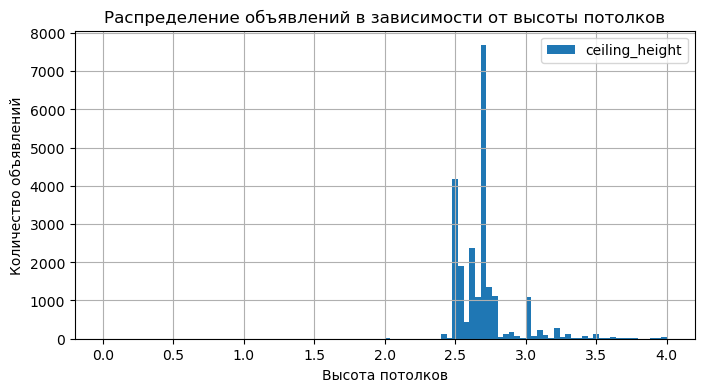

In [135]:
data.plot(y='ceiling_height',grid=True, kind='hist',bins=100, range=(0, 4),xlabel='Высота потолков', ylabel='Количество объявлений', 
          title='Распределение объявлений в зависимости от высоты потолков',figsize=(8,4));

Отбросим слишком низкие и слишком высокие значения. В России минимальной нормой сейчас считается потолок высотой 2.4 м. Все, что ниже, отбросим, так же ка и выше 4 метров.

In [137]:
data = data.query('2.4<ceiling_height<4')
data = data.drop(data[data['ceiling_height'] < 2.4].index)
data = data.drop(data[data['ceiling_height'] > 4].index)
data.shape[0]

22922

### Тип этажа

In [139]:
data['floor_type'].describe()

count      22922
unique         3
top       другой
freq       16948
Name: floor_type, dtype: object

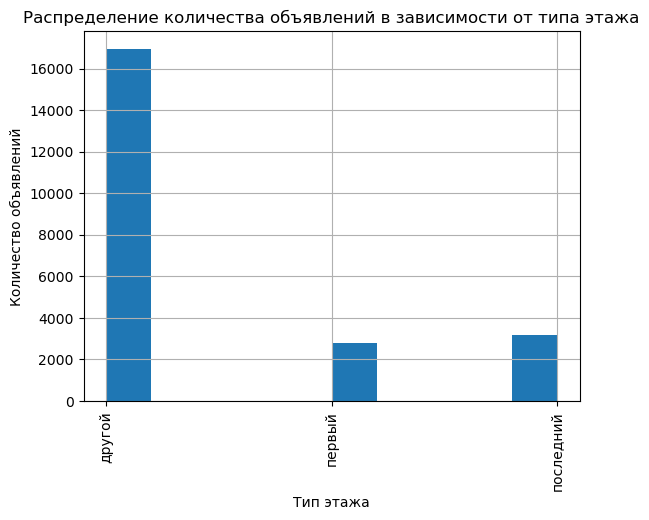

In [140]:
data['floor_type'].hist(xrot=90);
plt.title('Распределение количества объявлений в зависимости от типа этажа')
plt.xlabel('Тип этажа')
plt.ylabel('Количество объявлений');

Как и ожидалось, большинство квртир продаются не на первом и не на последнем этаже.

### Общее количество этажей

In [143]:
data['floors_total'].describe()

count   22922.00
mean       10.76
std         6.60
min         1.00
25%         5.00
50%         9.00
75%        16.00
max        60.00
Name: floors_total, dtype: float64

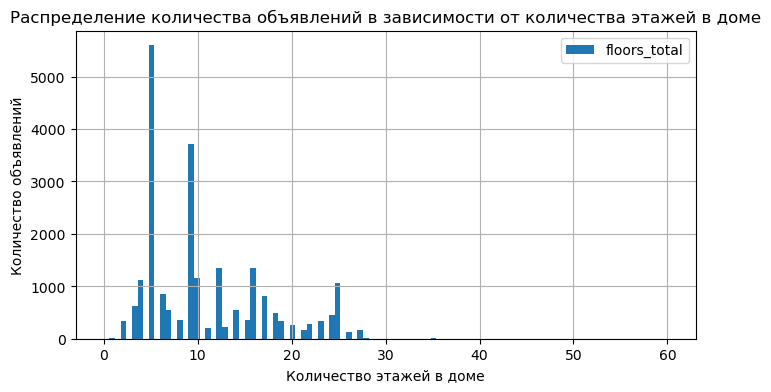

In [144]:
data.plot(y='floors_total',grid=True, kind='hist',bins=100, range=(0, 60), xlabel='Количество этажей в доме', ylabel='Количество объявлений', 
          title='Распределение количества объявлений в зависимости от количества этажей в доме',figsize=(8,4));

Выясним сколько у нас данных, в которых количество этажей в доме больше 30.

In [146]:
data.query('floors_total>30')['floors_total'].count() 

30

В данных есть 30 объявлений о прожаже квартир в высотках (больше 30 этажей), удалим их, чтобы они не влияли на остальные данные.

In [148]:
data = data.drop(data[data['floors_total'] > 30].index)
data.shape[0]

22892

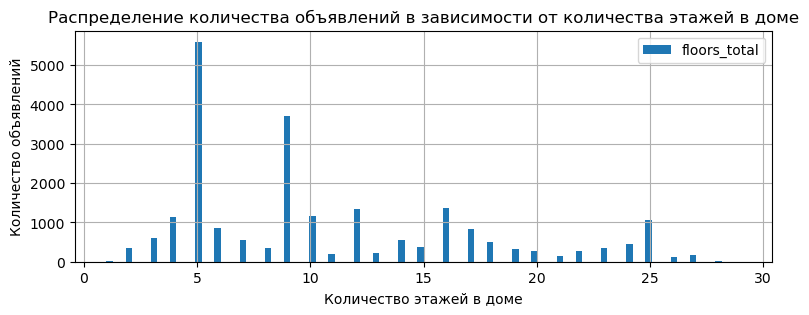

In [149]:
data.plot(y='floors_total',grid=True, kind='hist',bins=100, xlabel='Количество этажей в доме', ylabel='Количество объявлений', 
          title='Распределение количества объявлений в зависимости от количества этажей в доме',figsize=(9,3));

Видим, что основная масса квартир продается в пятиэтажных домах, строительство которых активно велось в 50-70х годах, и в девятиэтажных домах,  пик строительства которых был в 70-х.

### Расстояние до центра города

In [152]:
data['city_centers_nearest'].describe()

count   22892.00
mean    11040.70
std      9649.95
min         0.00
25%      2669.00
50%     11468.00
75%     15325.00
max     65968.00
Name: city_centers_nearest, dtype: float64

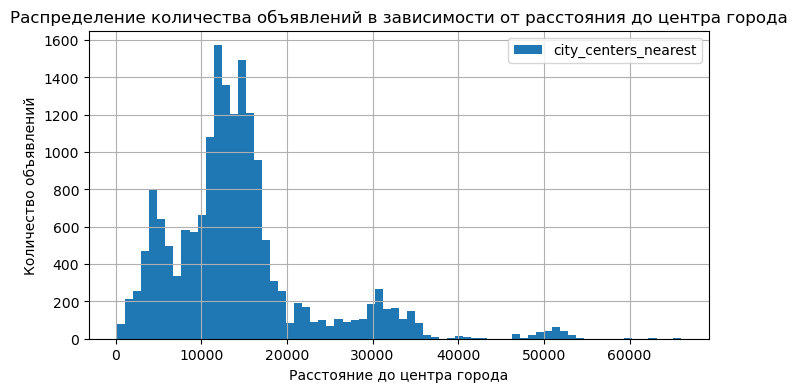

In [153]:
data.query('city_centers_nearest != 0').plot(y='city_centers_nearest',grid=True, kind='hist',bins=70,
                                             xlabel='Расстояние до центра города', ylabel='Количество объявлений', 
                                             title='Распределение количества объявлений в зависимости от расстояния до центра города',figsize=(8,4));

Большинство значений равно 0, но мы сами заполняли пропуски медианными значаниями так, что если посчитать медиану не удавалось, то  пропущенное значение менялось на 0, поэтому всплеск нулевых значений не стоит рассматривать. Дальше мы видим два пика в расстоянии около 15 000 метров от центра и около 30 000 м. Это скорее всего самые застраиваемые районы города и близлежащих населенных пунктов. 

### Расстояние до ближайшего парка

In [156]:
data['parks_nearest'].describe()

count   22892.00
mean      356.46
std       290.33
min         0.00
25%         0.00
50%       461.00
75%       461.00
max      3190.00
Name: parks_nearest, dtype: float64

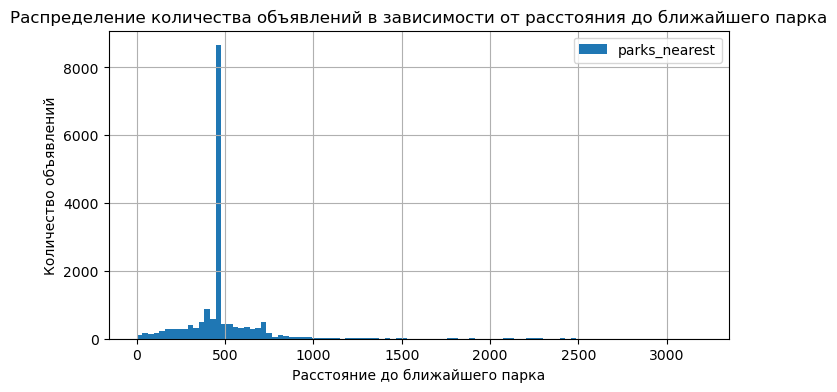

In [237]:
data.query('parks_nearest != 0').plot(y='parks_nearest',grid=True, kind='hist',bins=100,
                                      xlabel='Расстояние до ближайшего парка', ylabel='Количество объявлений', 
                                      title='Распределение количества объявлений в зависимости от расстояния до ближайшего парка', figsize=(8,4));

Большой пик мы видим для значения расстояния до ближайшего парка около 500 метров.

### Скорость продажи

In [240]:
data['days_exposition'].describe()

count   19854.00
mean      179.93
std       218.92
min         1.00
25%        45.00
50%        95.00
75%       229.00
max      1580.00
Name: days_exposition, dtype: float64

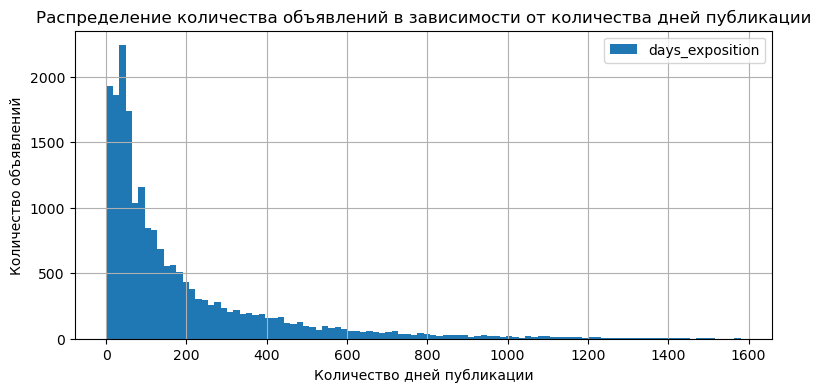

In [252]:
data.plot(y='days_exposition',grid=True, kind='hist',bins=100, xlabel='Количество дней публикации', ylabel='Количество объявлений', 
          title='Распределение количества объявлений в зависимости от количества дней публикации',figsize=(9,4));

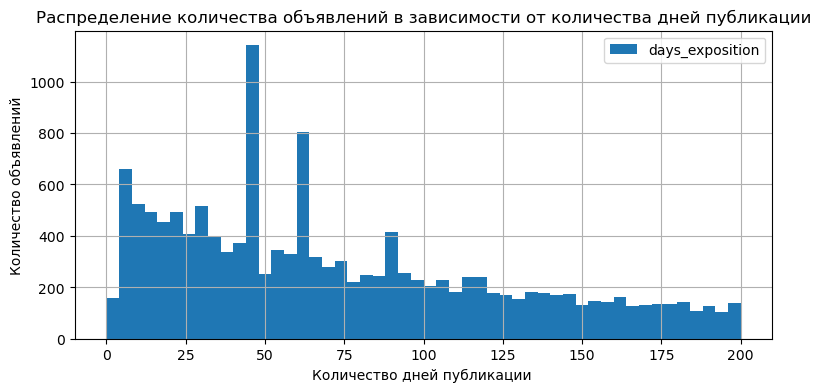

In [254]:
data.plot(y='days_exposition',grid=True, kind='hist',bins=50, range=(0,200), xlabel='Количество дней публикации ', ylabel='Количество объявлений', 
          title='Распределение количества объявлений в зависимости от количества дней публикации',figsize=(9,4));

In [260]:
data.query('days_exposition>1095')['days_exposition'].count()

162

Получили, что 162 объявления "висят" уже больше трех лет, удалим эти данные.

In [264]:
data = data.drop(data[data['days_exposition'] > 1095].index)
data.shape[0]

22730

В среднем квартиры продаются в течение полугода, быстрой продажей мы можем считать продажу за меньше, чем 45 дней (полтора месяца), а долгой - за больше, чем 240 (8 месяцев)

Посмотрим как менялась скорость продажи по годам

In [267]:
data.pivot_table(index='exposition_year',values='days_exposition')

,days_exposition
exposition_year,
2014,758.08
2015,575.60
2016,320.08
2017,158.50
2018,94.47
2019,30.96


In [269]:
data['days_exposition'].isna().sum()

3038

Как видим скорость продаж увеличивается, квартиры продаются быстрее.В 2018 году квартиры продавались в среднем за 95 дytq, а в 2014 году в среднем за 808 дней. Сейчас идет автопродление объявлений, так что скорее всего этим и обусловлено такое низкое значение в 2019 году (платные объявления автопродляются через 31 день). Также стоит учитывать, что есть еще больше 3000 непроданных квартир, которых нет в статистике о средней скорости продаж.

## Стоимость квартиры

Выясним, от каких параметров зависит стоимость квартиры.

Для начала рассмотрим зависит ли стоимость квартиры от ее площади.

### Зависит ли стоимость от площади

0.78

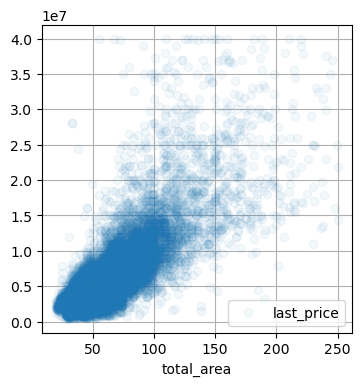

In [274]:
data.plot(x='total_area', y='last_price', style='o', grid=True, alpha=0.05, figsize=(4,4))
round(data['total_area'].corr(data['last_price']), 2)

Как видим, есть практически прямая зависимость, то есть чем больше площадь, тем больше стоимость квартиры.

### Зависимость стоимости от жилой площади

Проверим влияет ли большая жилая площадь на стоимость квартиры или люди обращают внимание только на общую площадь.

0.68

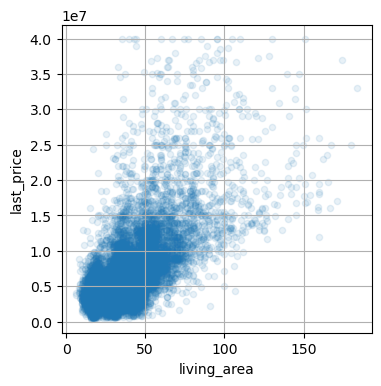

In [278]:
data.plot(x='living_area',y='last_price', kind='scatter', grid=True, alpha=0.1, figsize=(4,4))
round(data['living_area'].corr(data['last_price']), 2)

Здесь также можно сделать вывод, что чем больше жилая площадь, тем больше стоимость квартиры, хотя связь и менее крепкая, и разброс значений больше.

### Зависимость стоимости от площади кухни

0.6

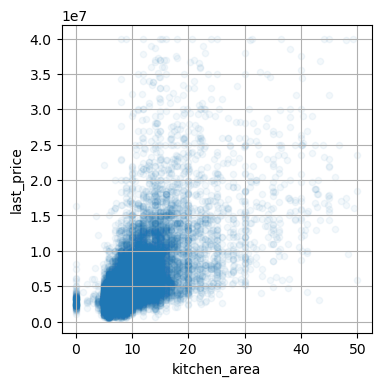

In [282]:
data.plot(x='kitchen_area',y='last_price', kind='scatter', grid=True, alpha =0.05, figsize=(4,4))
round(data['kitchen_area'].corr(data['last_price']), 2)

Как видим большинство квартир имеют площадь кухни от 5 до 25 квадратных метров, что практически никак не влияет на стоимость квартиры.

### Зависит ли стоимость от количества комнат

In [285]:
data_rooms = data.pivot_table(index='rooms', values='last_price')

In [287]:
data_rooms['rooms'] = sorted(data['rooms'].unique())
data_rooms

,last_price,rooms
rooms,,
0,3027729.78,0
1,3830382.57,1
2,5478318.95,2
3,7571585.44,3
4,10778557.16,4
5,14433526.82,5
6,17383875.68,6
7,19480857.14,7


0.99

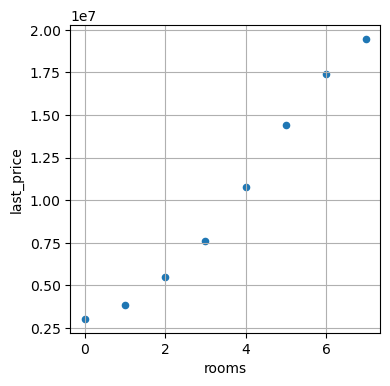

In [289]:
data_rooms.plot(x='rooms',y='last_price', kind='scatter',grid=True, figsize=(4,4))
round(data_rooms['rooms'].corr(data_rooms['last_price']), 2)

Очевидно, что чем больше комнат, тем выше стоимость квартир. Но рост как мы видим не линейный.

### Зависимость стоимости от этажа

In [293]:
data_floors = data.pivot_table(index='floor_type', values='last_price')
data_floors['floor_type'] = sorted(data['floor_type'].unique())
data_floors

,last_price,floor_type
floor_type,,
другой,6071653.58,другой
первый,4550692.22,первый
последний,5629751.36,последний


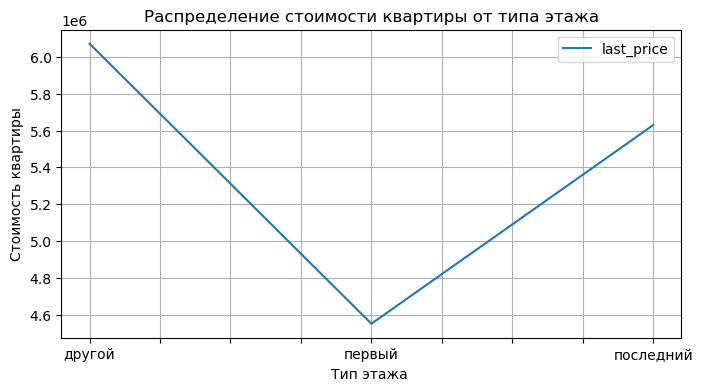

In [299]:
data_floors.plot(x='floor_type',y='last_price', grid=True, xlabel='Тип этажа ', ylabel='Стоимость квартиры', 
          title='Распределение стоимости квартиры от типа этажа', figsize=(8,4));


Видим, что цена у объектов, расположенных не на первом и не на последнем этажах самая высокая, при этом последние этажи предпочитают больше, чем первые.

### Зависит ли стоимость квартир от дня недели размещения объявления

Посмотрим зависит ли стоимость квартиры от дня недели, когда было размещено объявление. 

In [306]:
data_day = data.pivot_table(index='exposition_day', values='last_price')
data_day['exposition_day'] = sorted(data['exposition_day'].unique())
data_day

,last_price,exposition_day
exposition_day,,
0,5855151.11,0
1,5754172.96,1
2,5969179.78,2
3,5956761.51,3
4,5725323.36,4
5,5606897.75,5
6,5733875.72,6


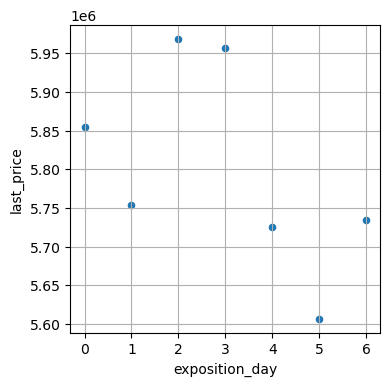

In [312]:
data_day.plot(x='exposition_day',y='last_price', kind='scatter',grid=True, figsize=(4,4));

Неожиданно оказалось, что наибольшая цена стоит в объявлениях, опубликованных в среду и четверг, а наименьшая в субботу.

### Зависит ли стоимость от месяца подачи объявления

In [315]:
data_month = data.pivot_table(index='exposition_month', values='last_price')
data_month['exposition_month'] = sorted(data['exposition_month'].unique())
data_month

,last_price,exposition_month
exposition_month,,
1,5898255.81,1
2,5835938.45,2
3,5744092.77,3
4,5835094.85,4
5,5890363.41,5
6,5669429.64,6
7,5752185.35,7
8,5882431.92,8
9,5915318.49,9


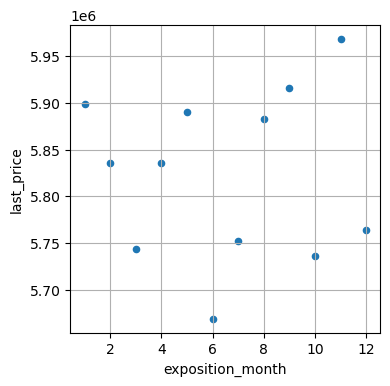

In [319]:
data_month.plot(x='exposition_month',y='last_price', kind='scatter',grid=True, figsize=(4,4));

Никакой зависимости стоимости от месяца публикации нет, единственно, в декабре стоимость была наивысшей.

### Зависимость стоимости квартиры от года

In [330]:
data['first_day_exposition'].min()

Timestamp('2014-11-27 00:00:00')

In [332]:
data['first_day_exposition'].max()

Timestamp('2019-05-03 00:00:00')

У нас есть данные об объявлениях, размещенных с 27 ноября 2014 года по 3 мая 2019 года. Следовательно, брать в расчет 2014 и 2019 не стоит, так как они не полные и это исказит полученные результаты.

In [322]:
data_year = data.pivot_table(index='exposition_year', values='last_price')
data_year['exposition_year'] = sorted(data['exposition_year'].unique())
data_year

,last_price,exposition_year
exposition_year,,
2014,9465073.26,2014
2015,6581858.81,2015
2016,5871975.90,2016
2017,5754469.07,2017
2018,5633048.66,2018
2019,6147881.19,2019


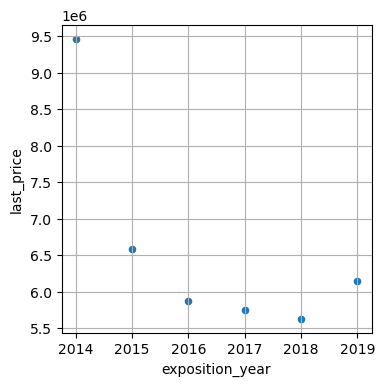

In [326]:
data_year.plot(x='exposition_year',y='last_price', kind='scatter',grid=True, figsize=(4,4));

Самыми высокими были цены в 2015 году, дальше пошел спад рынка. Однако, мы можем посмотреть какие факторы влияли на снижение стоимости.

In [335]:
data_area = data.pivot_table(index='exposition_year', values='total_area', aggfunc={'mean', 'count'})
data_area.columns = ['adv_count', 'total_area_mean']
data_area

,adv_count,total_area_mean
exposition_year,,
2014,94,81.12
2015,997,65.17
2016,2659,59.76
2017,7943,58.32
2018,8255,56.62
2019,2782,57.19


Как видим, с 2015 по 2018 год средняя площадь продаваемых квартир снизилась, что потянуло вниз и стоимость квартир. Также мы видим, что с каждым годом растет количество объявлений, что также способствует конкуренции и снижению стоимости.

Найдем населенные пункты с наибольшим количеством объявлений о продаже квартиры.

### Населенные пункты с наибольшим количеством объявлений

Сначала посчитаем сколько объявлений всего было подано в каждом населенном пункте

In [371]:
data_loc = data.pivot_table(index='locality_name', values='last_price', aggfunc={'count'})
data_loc.columns=['total_adv']
data_loc

,total_adv
locality_name,
Бокситогорск,15
Волосово,36
Волхов,109
Всеволожск,387
Выборг,231
...,...
садовое товарищество Рахья,1
село Копорье,4
село Павлово,7


Теперь уточним данные по годам

In [367]:
data_count = data.pivot_table(index='locality_name', columns='exposition_year', values='last_price', aggfunc={'count'})
data_count.columns=['2014','2015','2016','2017','2018','2019']
data_count

,2014,2015,2016,2017,2018,2019
locality_name,,,,,,
Бокситогорск,NaN,NaN,1.00,5.00,7.00,2.00
Волосово,NaN,1.00,4.00,15.00,15.00,1.00
Волхов,NaN,4.00,6.00,34.00,48.00,17.00
Всеволожск,3.00,21.00,45.00,115.00,167.00,36.00
Выборг,NaN,9.00,37.00,77.00,77.00,31.00
...,...,...,...,...,...,...
садовое товарищество Рахья,NaN,NaN,NaN,1.00,NaN,NaN
село Копорье,NaN,NaN,NaN,2.00,2.00,NaN
село Павлово,NaN,NaN,1.00,2.00,3.00,1.00


Объединим эти таблицы

In [377]:
merged_df = pd.merge(data_count, data_loc, left_index=True, right_index=True)
merged_df

,2014,2015,2016,2017,2018,2019,total_adv
locality_name,,,,,,,
Бокситогорск,NaN,NaN,1.00,5.00,7.00,2.00,15
Волосово,NaN,1.00,4.00,15.00,15.00,1.00,36
Волхов,NaN,4.00,6.00,34.00,48.00,17.00,109
Всеволожск,3.00,21.00,45.00,115.00,167.00,36.00,387
Выборг,NaN,9.00,37.00,77.00,77.00,31.00,231
...,...,...,...,...,...,...,...
садовое товарищество Рахья,NaN,NaN,NaN,1.00,NaN,NaN,1
село Копорье,NaN,NaN,NaN,2.00,2.00,NaN,4
село Павлово,NaN,NaN,1.00,2.00,3.00,1.00,7


Выведем ТОП-10 населенных пунктов по общему количеству объявлений

In [379]:
merged_df.sort_values('total_adv', ascending=False).head(10)

,2014,2015,2016,2017,2018,2019,total_adv
locality_name,,,,,,,
Санкт-Петербург,71.00,702.00,1781.00,5349.00,5235.00,1929.00,15067
Мурино,1.00,17.00,47.00,201.00,260.00,52.00,578
поселок Шушары,NaN,11.00,70.00,155.00,167.00,33.00,436
Всеволожск,3.00,21.00,45.00,115.00,167.00,36.00,387
Пушкин,2.00,16.00,55.00,137.00,108.00,36.00,354
Колпино,4.00,10.00,30.00,121.00,135.00,34.00,334
поселок Парголово,NaN,10.00,33.00,132.00,124.00,26.00,325
Гатчина,NaN,13.00,57.00,100.00,96.00,36.00,302
деревня Кудрово,1.00,21.00,48.00,156.00,70.00,NaN,296


Видим, что лидером является Санкт-Петербург.

### Населенные пункты с самой высокой стоимостью квадратного метра

In [384]:
data_cost = data.pivot_table(index='locality_name', values='cost_per_meter', aggfunc={'mean', 'count'})
data_cost.columns = ['adv_number','mean_cost']

In [390]:
data_cost_top = data_cost.sort_values('adv_number', ascending=False).head(10)
data_cost_top['locality_name']=data_cost_top.index
data_cost_top

,adv_number,mean_cost,locality_name
locality_name,,,
Санкт-Петербург,15067,111320.51,Санкт-Петербург
Мурино,578,85920.69,Мурино
поселок Шушары,436,78482.50,поселок Шушары
Всеволожск,387,68533.32,Всеволожск
Пушкин,354,102938.32,Пушкин
Колпино,334,75386.12,Колпино
поселок Парголово,325,90061.95,поселок Парголово
Гатчина,302,68678.93,Гатчина
деревня Кудрово,296,92376.56,деревня Кудрово


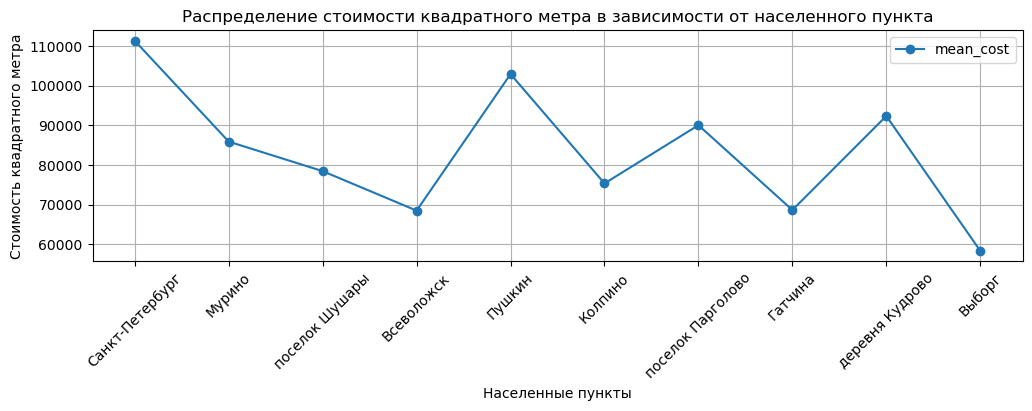

In [392]:
data_cost_top.plot(x='locality_name', y='mean_cost', style='o-',grid=True, xlabel='Населенные пункты', ylabel='Стоимость квадратного метра', title='Распределение стоимости квадратного метра в зависимости от населенного пункта', figsize=(12,3));
plt.xticks(np.arange(len(data_cost_top)), data_cost_top['locality_name'],rotation=45);

Ожидаемо, что самая высокая цена за квадратный метр в Санкт-Петербурге, а самая низкая в Выборге.

### Стоимость квадратного метра в Петербурге

In [407]:
data_petersburg = data.query('locality_name == "Санкт-Петербург"')
data_petersburg_cost= data_petersburg.pivot_table(index='city_center_km', values='last_price')
data_petersburg_cost

,last_price
city_center_km,
0.00,13898600.00
1.00,12326701.86
2.00,11544785.71
3.00,9881599.85
4.00,10789945.33
5.00,11162525.64
6.00,10635806.24
7.00,10631324.65
8.00,8908772.26


In [409]:
data_petersburg_cost['city_center'] = sorted(data_petersburg['city_center_km'].unique())

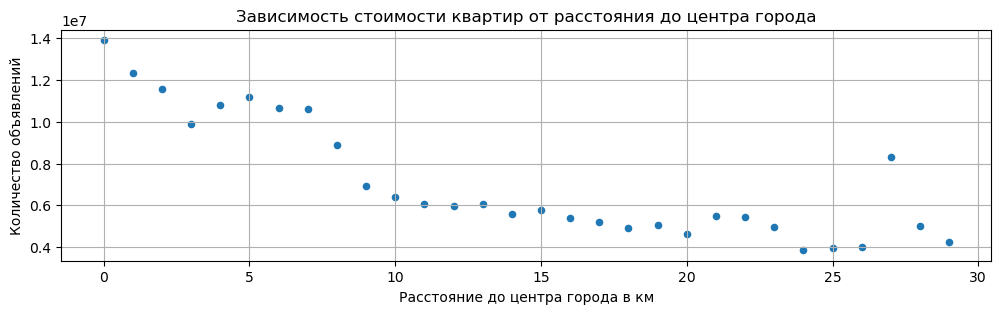

In [411]:
data_petersburg_cost.plot(x='city_center',y='last_price', kind='scatter',grid=True, 
                          xlabel='Расстояние до центра города в км', ylabel='Количество объявлений', 
                          title='Зависимость стоимости квартир от расстояния до центра города', figsize=(12,3));

В Санкт_Петербурге в самом центре самая высокая стоимость квадратного метра, чем дальше от центра, тем она ниже. Но на расстоянии от трех до семи километров отцентра стоимость возрастает.

Изучим записи, которые привели к выбросу на 27-м км.

In [413]:
data_petersburg.query('city_center_km==27')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_per_meter,exposition_day,exposition_month,exposition_year,floor_type,city_center_km
748,13,14350000.00,74.00,2017-11-28,2,3.13,5,30.00,3,NaN,False,False,25.00,0,Санкт-Петербург,23888.00,27313.00,1,1496.00,0,503.00,128.00,193918.92,1,11,2017,другой,27.00
5961,6,2250000.00,32.00,2018-02-27,1,2.70,2,16.50,2,NaN,False,False,7.00,0,Санкт-Петербург,24006.00,27431.00,0,461.00,0,503.00,178.00,70312.50,1,2,2018,последний,27.00


У нас всего 2 записи на 27-м км. (на сырых данных), одна из которых с аномально высокой ценой, а другая с аномально низкой, по этой причине мы отвергаем данное наблюдение.

Посмотрим на количество квартир разных категорий (первый, последний, другой), которые продаются на 3-м км. и 5-ом ... и какую долю они занимают на каждом километре, чтобы объяснить пик  и провал в центре

In [418]:
data3= data_petersburg.query('city_center_km==3').pivot_table(index='floor_type', values='last_price', aggfunc={'count','mean'})
data3['fraction']= data3['count'] / data3['count'].sum()
data3

,count,mean,fraction
floor_type,,,
другой,198,10522951.01,0.61
первый,53,7373960.38,0.16
последний,73,9962659.62,0.23


In [420]:
data5 = data_petersburg.query('city_center_km==5').pivot_table(index='floor_type', values='last_price', aggfunc={'count','mean'})
data5['fraction']= data5['count'] / data5['count'].sum()
data5

,count,mean,fraction
floor_type,,,
другой,628,11445734.36,0.76
первый,75,7521865.99,0.09
последний,123,11936463.80,0.15


На расстоянии 5 км от центра доля квартир, продаваемых на этажах, отличных от первого и последнего больше, чем соответствующая доля квартир на расстоянии 3 км от центра. Стоимость таких гораздо выше, чем квартир на последнем и первом этажах, поэтому мы видим скачок на графике.

## Выводы

У нас были данные об объявлениях по продаже квартир в городе Санкт-Петербурге и соседних населенных пунктах.

 Название одного столбца мы изменили с `cityCenters_naerest` на `city_centers_nearest`. 

 В самих данных мы столкнулись с большим количеством пропусков значений, часть из которых была вызвана человеческим фактором (пользователи сами заполняли параметры квартир при публикации объявлений), остальные были скорее всего вызваны сбоем при выгрузке данных из картографических систем.

 Пропуски в пользовательских параметрах мы или заполняли,как в столбце `balcony` нулевым значением, или удаляли, как в столбцах `floors_total`, `locality_name`. В столбце `kitchen_area` часть пропусков мы заполнили нулевыми значениями, так как это были квартиры-студии,в которых кухня не выделяется как отдельное помещение.

 В столбце `locality_name`мы убрали неявные дубликаты, привели названия населенных пунктов к единому виду,оставив тип населенного пункта, так как при одинаковом названии они могут иметь разный тип, и это два отдельных населенных пункта (например, село и поселок Павлово), а некоторые объединили, как поселок Мурино и Мурино, деревня Кудрово и Кудрово, так как эти населенные пункты получили статус города.

 В столбце `ceiling_height` пропуски мы заполняли медианными значениями по населенным пунктам, если же в каком-либо населенном пункте посчитать медиану не получалось (не было данных), то мы заменяли пропущенное значение на минимальную норму в России, равную 2,4 метра.

 Также мы удалили строки. в которых сумма жилой площади и площади кухни оказывалась больше или равна общей площади, что невозможно, так как в квартирах есть санузлы, коридоры и другие помещения,  площадь которых не входит в жилую площадь.

 В столбцах `airports_nearest`, `city_center_nearest`, `parks_nearest`, `ponds_nearest`, `parks_around3000` и `ponds_around3000` мы также заменяли пропущенные значения медианными по населенному пункту, если таких данных не было, то ставили 0.

 Пропущенные значения в `days_exposition` мы оставили, так как пропуск может означать, что объявление все еще актуально, а тип данных изменили на datetime. В столбцах `floors_total`, `balcony`, `parks_around3000` и `ponds_around3000` мы заменили тип данных на int,  так как у нас не может быть 9.5 этажей в доме или 1.5 парка рядом с домом.

Добавили несколько столбцов в наши данные: 
* стоимость квадратного метра `cost_per_meter`;
* день, месяц и год публикации объявления `exposition_day`, `exposition_month`, `exposition_year`;
* тип этажа, на котором рассполагается объект (первый, последний или другой) `floor_type`;
* расстояние до центра города в километрах `city_center_km`

Рассмотрели несколько параметров квартир:
- большинство продаваемых квартир имеют площадь не более 100 квадратных метров, мы отбросили данные, где общая площадь была слишком маленькой (меньше 20 метров) и слишком большой (более 250 метров), так как у нас нет уверенности в достоверности этих данных.
- в данных по жилой площади мы обнаружили квартиры с жилой площадью равной 2 кв.м. Так как жилая площадь это сумма всех помещений, пригодных для проживания, а точнее комнат, то комната площадью 2-3 кв.м. выглядит очень странно. Санитарный минимум для жилой площади у нас в стране установлен в 6 кв.м., поэтому строки, в которых жилая площадь была меньше мы отбросили.
- по площади кухни можно сказать, что в основном продаются квартиры с площадью кухни в 10-20 кводратных метров, что соответствует современной застройке, есть квартиры-студиив которых кухня не выделяется как отдельное помещение (мы заменяли в таких квартирах площадь кухни на 0), есть также квартиры, где кухня объединена с комнатой и тогда площадь кухни будет больше 20 кв.м., мы отбросили объявления с площадью кухни больше 50 кв.м.
- по стоимости квартир можно сказать, чтов среднем квартиры продаются по 3-6 миллионов рублей, хотя, конечно есть и очень высокие стоимости, ограничили данные 40 миллионами рублей.
- большинство выставленных на продажу квартир - это одно- и двух-комнатные, квартиры-студии мало присутствуют в продажах, как и редки квартиры с большим количеством комнат, редкие значения (количество комнат больше 7 мы не стали брать).
- в данных о высоте потолков было достаточно много опечатков, например, высота потолка 25 метров и 1 метр. В первом случае мы предположили опечатку пользователя и исправили данные, уменьшив высоту в 10 раз. В полученных данных мы оставили квартиры, высота потолков которых не меньше минимальной нормы по России в 2.4 метра и не больше 4 метров, так как комнаты с высотой в 5 и даже 14 метров будут выглядеть как колодцы или тут скорее всего актовые залы.
- как и ожидплось большинство объявлений о продаже квартир не на первои или последнем этажах.
- большинство квартир продаются в домах до 20 этажей, больше всего в 5 и 9 этажках.
- мы видим два пика в расстоянии около 15 000 метров от центра и около 30 000 м. Это скорее всего самые застраиваемые районы города и близлежащих населенных пунктов.
- Много объявлений, которые находятся на расстоянии 500 метров до ближайшего парка.

Изучили скорость продажи квартир: в среднем квартиры продаются в течение полугода, быстрой продажей мы можем считать продажу за меньше, чем 45 дней (полтора месяца), а долгой - за больше, чем 240 (8 месяцев).

Также мы рассмотрели от чего может зависеть стоимость квартиры, выяснили, что стоимость напрямую зависит от общей площади квартиры, также жилая площадь влияет на стоимость квартиры, ведь платить за большой коридор и маленькие комнаты люди не хотят. Площадь кухни не влияет на стоимость квартиры, а вот количество комнат влияет, чем больше комнат, тем выше стоимость. Стоимость квартир на средних этажах выше, нежели на первом или последнем, первый этаж самый не удобный в плане стоимости, здесь самая низкая цена. Лучше всего публиковать объявление в среду и  четверг, тут самая высокая стоимость, а вот в субботу самая низкая. От месяца публикации стоимость не зависит, больше всего квартир продавали в 2018 году, а вот в 2019 объем резко сократился, при этом с 2015 года падала средняя площадь продаваемых квартир, что влияло и на стоимость.

Больше всего объявлений о продаже квартир было опубликовано в Санкт-Петербурге, здесь же и самая высокая стоимость квадратного метра. Самая низкая стоимость квадратного метра в Выборге. Самые дорогие квартиры продаются в центре Санкт-Петербурга, чем дальше от центра тем стоимость ниже.